In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [28]:
train = pd.read_csv('dataset.csv')
train.head()

text  label
0  10 25 Am Still waiting on the doc to come and ...  Other
1  i donbt like to peel prawns, i also dont like ...  Other
2  Woohoo..this is the day/week the Lord has made...  Other
3  does anybody want to throw a baseball around w...  Other
4  well.. all my slacking off earned me a D and a...  Other

In [29]:
train = train.dropna()

In [33]:
test = pd.read_csv('dataset_test.csv')
test.head()

text  label
0  10 25 Am Still waiting on the doc to come and ...  Other
1  Nothings better than having to take a cold sho...  Other
2  Woohoo..this is the day/week the Lord has made...  Other
3   **** - doesn`t show how people are more conse...  Other
4   I know. I was hoping to meet you tonite  & I ...  Other

In [34]:
print('train.shape',train.shape, 'test.shape',test.shape)

train.shape (13776, 2) test.shape (9746, 2)


In [37]:
df = pd.concat([train, test])
df.head()

text  label
0  10 25 Am Still waiting on the doc to come and ...  Other
1  i donbt like to peel prawns, i also dont like ...  Other
2  Woohoo..this is the day/week the Lord has made...  Other
3  does anybody want to throw a baseball around w...  Other
4  well.. all my slacking off earned me a D and a...  Other

In [38]:
df['label'].value_counts()

label
Other       22981
Not sure      466
DDoS           75
Name: count, dtype: int64

In [39]:
mapping = {'Other':0,'Not sure':1,'DDoS':2}
df['ylabel'] = df['label'].map(mapping)
df.head()

text  label  ylabel
0  10 25 Am Still waiting on the doc to come and ...  Other       0
1  i donbt like to peel prawns, i also dont like ...  Other       0
2  Woohoo..this is the day/week the Lord has made...  Other       0
3  does anybody want to throw a baseball around w...  Other       0
4  well.. all my slacking off earned me a D and a...  Other       0

In [40]:
from nltk.tokenize import word_tokenize

import re

def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(str(text).lower())

    # Define stop words
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))

    # Remove stop words
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Define regular expressions for preprocessing
    # Here, we'll remove punctuation and special characters
    regex = r"[^\w\s]"

    # Apply regular expressions
    filtered_text = ' '.join(filtered_tokens)
    filtered_text = re.sub(regex, '', filtered_text)
    return filtered_text

In [41]:
df['text_Processed'] = df['text'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TruongVu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TruongVu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TruongVu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TruongVu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TruongVu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TruongVu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloadin

In [42]:
df['text_len'] = df['text'].apply(lambda x: len(str(x)))

In [43]:
df['text_Processed_len'] = df['text_Processed'].apply(lambda x: len(str(x)))

In [44]:
df.head()

text  label  ylabel  \
0  10 25 Am Still waiting on the doc to come and ...  Other       0   
1  i donbt like to peel prawns, i also dont like ...  Other       0   
2  Woohoo..this is the day/week the Lord has made...  Other       0   
3  does anybody want to throw a baseball around w...  Other       0   
4  well.. all my slacking off earned me a D and a...  Other       0   

                                      text_Processed  text_len  \
0          10 25 still waiting doc come break water         61   
1  donbt like peel prawns  also dont like going s...       126   
2  woohoo  dayweek lord made  remembered get wear...       105   
3                anybody want throw baseball around         53   
4  well  slacking earned c least everything else ...       137   

   text_Processed_len  
0                  41  
1                  95  
2                  68  
3                  35  
4                  76

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text_Processed'])
train_data = X[0:13776]
train_label = df['ylabel'][0:13776]
test_data = X[13776:]
test_label = df['ylabel'][13776:]
print('train', train_data.shape, train_label.shape)
print('test', test_data.shape, test_label.shape)

train (13776, 17438) (13776,)
test (9746, 17438) (9746,)


In [47]:
#Train Test Split (For train_data)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data, train_label, test_size=0.33, random_state=42)

In [48]:
#Multinominal Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

mnb = MultinomialNB(force_alpha=True)

In [49]:
# common function for all classifier model

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
def report_model(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()

c:\Users\TruongVu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\TruongVu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\TruongVu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4453
           1       0.00      0.00      0.00        84
           2       1.00      0.10      0.18        10

    accuracy                           0.98      4547
   macro avg       0.66      0.37      0.39      4547
weighted avg       0.96      0.98      0.97      4547



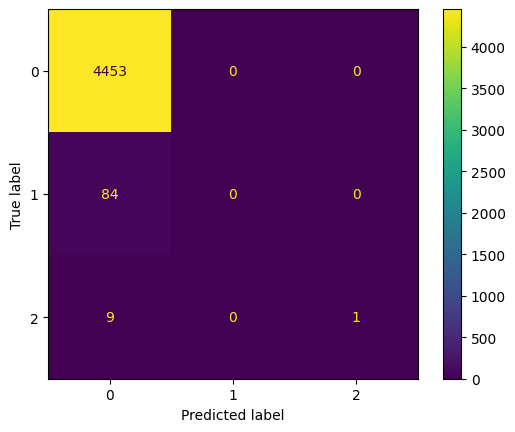

In [50]:
mnb_param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 3.0, 5.0,7.0, 10],
}

mnb_grid_model = GridSearchCV(estimator=mnb, param_grid=mnb_param_grid, cv=10)

report_model(mnb_grid_model)

In [51]:
mnb_grid_model.best_params_

{'alpha': 0.5}

In [53]:
#XGBClassifier for classification
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

xgb = XGBClassifier()


In [55]:
param_dist = {
    'n_estimators': [100],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    # 'subsample': np.arange(0.5, 1.0, 0.1),
    # 'colsample_bytree': np.arange(0.5, 1.0, 0.1),
    'booster': ['gbtree'],
    # 'objective': ['binary:logistic'],
}

random_model = RandomizedSearchCV(estimator=xgb, param_distributions= param_dist, cv=10,n_iter=50, n_jobs= -1)

c:\Users\TruongVu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 9 is smaller than n_iter=50. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4453
           1       1.00      0.06      0.11        84
           2       1.00      1.00      1.00        10

    accuracy                           0.98      4547
   macro avg       0.99      0.69      0.70      4547
weighted avg       0.98      0.98      0.97      4547



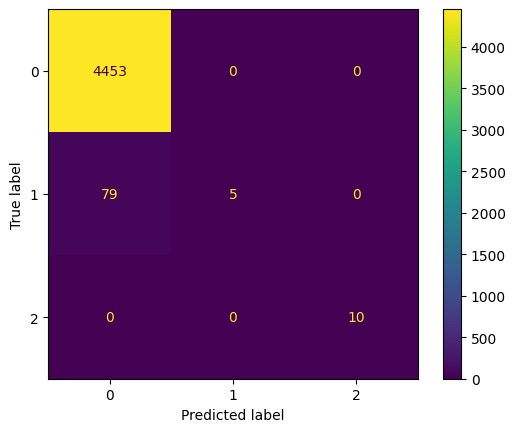

In [56]:
report_model(random_model)

In [ ]:
#Extra Tree Classifier/Random Forest Classifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4453
           1       0.92      0.27      0.42        84
           2       1.00      1.00      1.00        10

    accuracy                           0.99      4547
   macro avg       0.97      0.76      0.80      4547
weighted avg       0.99      0.99      0.98      4547



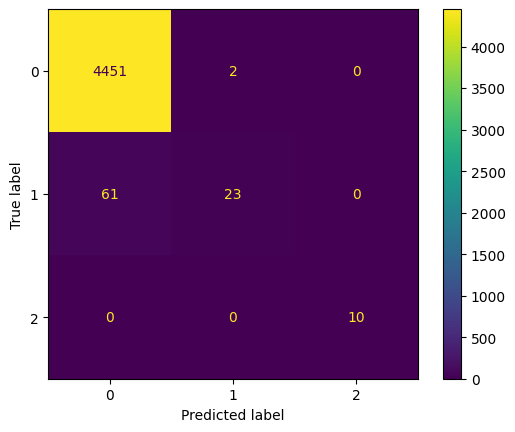

In [57]:
clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
report_model(clf)

In [60]:
rfc = RandomForestClassifier()
# Define a grid of hyperparameters to search through
param_grid_rfc = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4]
}

grid_model_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid_rfc, cv=5)

report_model(grid_model_rfc)

KeyboardInterrupt: 